AoL Machine Learning (Rain Prediction)

Kelas LB06

Anggota:
*   Theophilus Nathan Tanudjaja - 2502007514
*   Wicakra Hanly Tanudjaja - 2502032964
*   Amsal Anugrah - 2502048666


#Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

#Read Dataset

In [ ]:
df_raw = pd.read_csv("weatherAUS.csv")
df_raw.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df_raw.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Data cleaning

In [ ]:
#Mengganti No dan Yes pada kolom RainToday dan RainTommorrow ke dalam bentuk biner
df_new = df_raw.copy()
df_new['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df_new['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [ ]:
#drop object variable
df_clean = df_new.copy()
df_clean = df_clean.drop(['Location'], axis = 1)
#drop location karena object

In [ ]:
#data cleaning visualization
df_clean2 = df_clean.copy()
print("na value in percentage:")
for col in df_clean2:
    missing_percentage = (df_clean2[col].isna().sum() * 100 / len(df_clean2))
    print("%-14s: %.2f" % (col, missing_percentage) + "%")

na value in percentage:
Date          : 0.00%
MinTemp       : 1.02%
MaxTemp       : 0.87%
Rainfall      : 2.24%
Evaporation   : 43.17%
Sunshine      : 48.01%
WindGustDir   : 7.10%
WindGustSpeed : 7.06%
WindDir9am    : 7.26%
WindDir3pm    : 2.91%
WindSpeed9am  : 1.21%
WindSpeed3pm  : 2.11%
Humidity9am   : 1.82%
Humidity3pm   : 3.10%
Pressure9am   : 10.36%
Pressure3pm   : 10.33%
Cloud9am      : 38.42%
Cloud3pm      : 40.81%
Temp9am       : 1.21%
Temp3pm       : 2.48%
RainToday     : 2.24%
RainTomorrow  : 2.25%


In [ ]:
#drop column with > 38% missing value
df_clean2 = df_clean2.drop([ 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis = 1)

#fill NaNs with column medians in each column
df_clean2 = df_clean2.fillna(df_clean2.median())

#drop na value from RainToday and RainTomorrow(categorical analisist)
df_clean2 = df_clean2.dropna()

<ipython-input-6-6ded141d054a>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean2 = df_clean2.fillna(df_clean2.median())


In [ ]:
#separate raintomorrow by value
df = df_clean2.copy()
no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]

#model ke 3
# Detecting outliers with IQR
#removing outliers raintomorrow = no
c1 = no.copy()
Q1 = no.quantile(0.25)
Q3 = no.quantile(0.75)
IQR = Q3 - Q1
no = no[~((no < (Q1 - 1.5 * IQR)) |(no > (Q3 + 1.5 * IQR))).any(axis=1)]

#removing outliers in raintomorrow = yes
c2 = yes.copy()
Q1 = yes.quantile(0.25)
Q3 = yes.quantile(0.75)
IQR = Q3 - Q1
yes = yes[~((yes < (Q1 - 1.5 * IQR)) |(yes > (Q3 + 1.5 * IQR))).any(axis=1)]

#concat
df2 = pd.concat([no, yes])
print(len(c1))
print(len(no))
print(len(c2))
print(len(yes))


<ipython-input-7-b0a2ff135641>:10: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = no.quantile(0.25)
<ipython-input-7-b0a2ff135641>:11: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = no.quantile(0.75)
<ipython-input-7-b0a2ff135641>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no = no[~((no < (Q1 - 1.5 * IQR)) |(no > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-7-b0a2ff135641>:17: FutureWarning: The default value of numeric_only in DataFrame.quantile is de

98933
74211
27907
22842


<ipython-input-8-50b7f2536bea>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_new.corr()[['RainTomorrow']].sort_values(by = 'RainTomorrow')


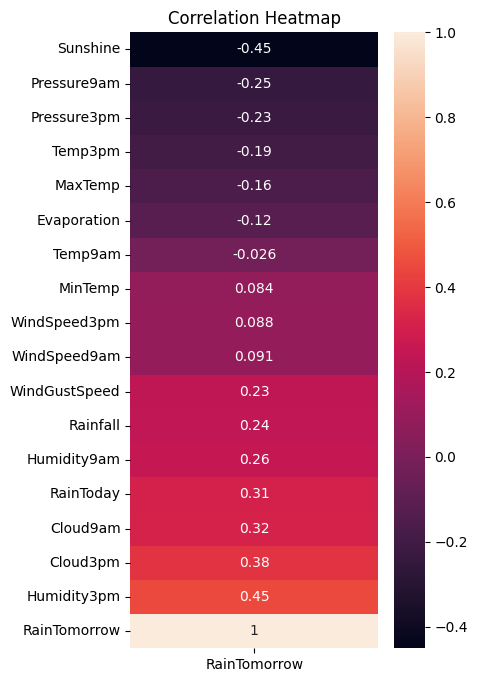

In [ ]:
df_corr = df_new.corr()[['RainTomorrow']].sort_values(by = 'RainTomorrow')
plt.figure(figsize=(4, 8))
sns.heatmap(df_corr, annot = True, annot_kws={"fontsize": 10})
plt.title('Correlation Heatmap')
plt.show()

berdasarkan heatmap, 2 kolom yang memiliki korelasi terendah adalah kolom Temp9am dan MinTemp, jadi kita tidak memerlukan kolom tersebut.

In [ ]:
df3 = df2.copy()
df3 = df3.drop([ 'Temp9am', 'MinTemp'], axis = 1)

# Feature Engineering

In [ ]:
#ganti jadi bulan
df_fe= df3.copy()
Month = pd.DatetimeIndex(df_fe['Date']).month

df_fe['Month'] = Month
df_fe.drop(['Date'],axis=1,inplace=True)


In [ ]:
#mapping wind direction labels to degrees
df_fe2 = df_fe.copy()
dict_dir = {'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5}
df_fe2['WindGustDir'].replace(dict_dir, inplace=True)
df_fe2['WindDir9am'].replace(dict_dir, inplace=True)
df_fe2['WindDir3pm'].replace(dict_dir, inplace=True)

EDA?

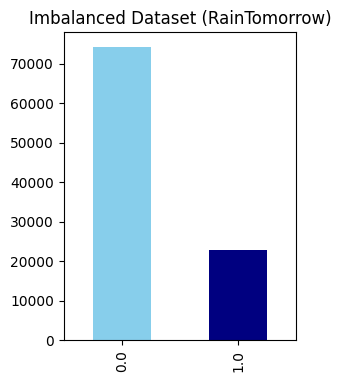

In [ ]:
#imbalance
plt.figure(figsize=(3,4))
df3.RainTomorrow.value_counts().plot(kind='bar', color= ['skyblue','navy'])
plt.title('Imbalanced Dataset (RainTomorrow)')
plt.show()

BUILDING MODEL

In [ ]:
#data
df_final = df_fe2.copy()
X = df_final.drop('RainTomorrow', axis = 1)
Y = df_final['RainTomorrow']
Y.value_counts()


0.0    74211
1.0    22842
Name: RainTomorrow, dtype: int64

In [ ]:
#split train and test

x_train, x_rem, y_train, y_rem = train_test_split(X, Y, train_size = 0.6, random_state = 44)
x_test, x_valid, y_test, y_valid = train_test_split(x_rem, y_rem, test_size = 0.5, random_state = 44)

print(y_train.count())
print(y_test.count())
print(y_valid.count())


58231
19411
19411


In [ ]:
#oversampling (smote) avoid overfitting pada data imbalance
smote = SMOTE(sampling_strategy = 'minority')
x_train2, y_train2 = smote.fit_resample(x_train,y_train)
y_train2.value_counts()

0.0    44664
1.0    44664
Name: RainTomorrow, dtype: int64

# Building model

##Random Forest Model

In [ ]:
RF_model = RandomForestClassifier()

RF_model.fit(x_train2, y_train2)

RandomForestClassifier()

##Grid Search for best paramaeter (hyperparameter tuning)

In [ ]:
#untuk menghemat waktu, sample size di kecilin untuk gridsearch
x_train3 = x_train2.sample(n=5000, random_state=123)
y_train3 = y_train2.sample(n=5000, random_state=123)

param = {
    'n_estimators': [500, 550, 600],
    'max_depth': [30, 35, 40],
    'bootstrap': [False, True]
}

RF = RandomForestClassifier()
grid_search = GridSearchCV(RF, param, cv=5)
grid_search.fit(x_train3, y_train3)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False, True], 'max_depth': [30, 35, 40],
                         'n_estimators': [500, 550, 600]})

In [ ]:
RF_model1 = RandomForestClassifier(**grid_search.best_params_)
RF_model1.fit(x_train2, y_train2)

RandomForestClassifier(bootstrap=False, max_depth=35, n_estimators=600)

##Logistic Model

In [ ]:
log_model = LogisticRegression(n_jobs=4)
log_model.fit(x_train2, y_train2)

LogisticRegression(n_jobs=4)

##Gaussian NB Model

In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(x_train2, y_train2)

GaussianNB()

# EVALUATE MODEL

In [ ]:
def plot_roc_cur(fper, tper, model):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC Curve'.format(type(model).__name__))
    plt.legend()
    plt.show()

def evaluate_model(model, x_test, y_test):
    prediction = model.predict(x_test)

    cm = confusion_matrix(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)
    report = classification_report(y_test, prediction)

    print("Classification Report\n", report)
    print ('--')
   # print(classification_report(y_test,y_pred,digits=5))
    print ('Confusion Matrix\n', cm)
    print ('--')
    print("ROC Area under Curve = {}".format(roc_auc))
    probs = model.predict_proba(x_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper, model)
    return float(report.split()[12])

##Classification Report for Random Forest Model with ROC Curve

Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.93     14716
         1.0       0.84      0.71      0.77      4695

    accuracy                           0.90     19411
   macro avg       0.87      0.83      0.85     19411
weighted avg       0.89      0.90      0.89     19411

--
Confusion Matrix
 [[14076   640]
 [ 1370  3325]]
--
ROC Area under Curve = 0.8323550670833887


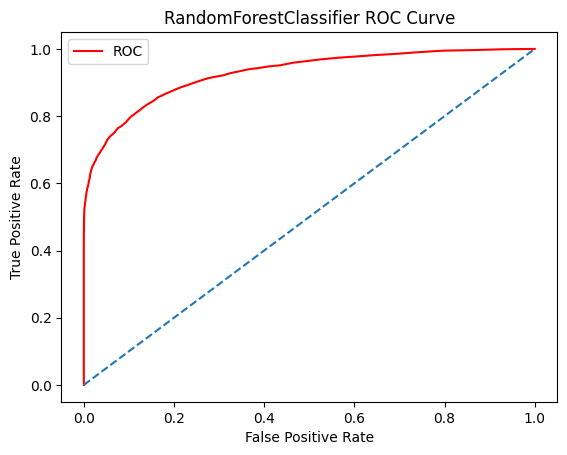

In [ ]:
RF_f1 = evaluate_model(RF_model, x_test, y_test)

Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.93     14716
         1.0       0.85      0.70      0.77      4695

    accuracy                           0.90     19411
   macro avg       0.88      0.83      0.85     19411
weighted avg       0.90      0.90      0.89     19411

--
Confusion Matrix
 [[14152   564]
 [ 1414  3281]]
--
ROC Area under Curve = 0.8302514545179286


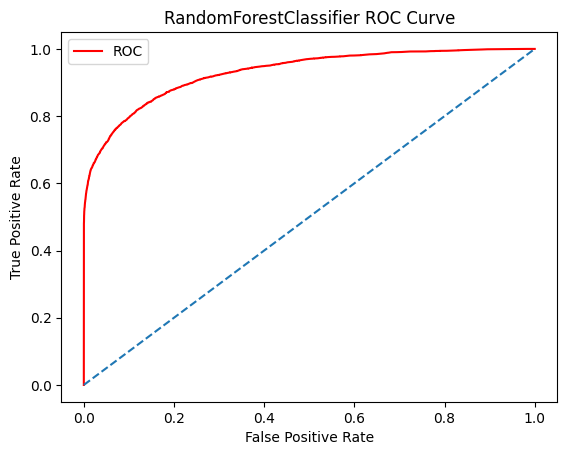

In [ ]:
RF1_f1 = evaluate_model(RF_model1, x_test, y_test)

hasil ini jika dibandingkan dengan random forest biasa itu sama saja, jadi tidak perlu digunakkan.

##Classification Report for Logistic Model with ROC Curve

Classification Report
               precision    recall  f1-score   support

         0.0       0.92      0.84      0.88     14716
         1.0       0.61      0.78      0.68      4695

    accuracy                           0.82     19411
   macro avg       0.76      0.81      0.78     19411
weighted avg       0.85      0.82      0.83     19411

--
Confusion Matrix
 [[12341  2375]
 [ 1043  3652]]
--
ROC Area under Curve = 0.8082299054501834


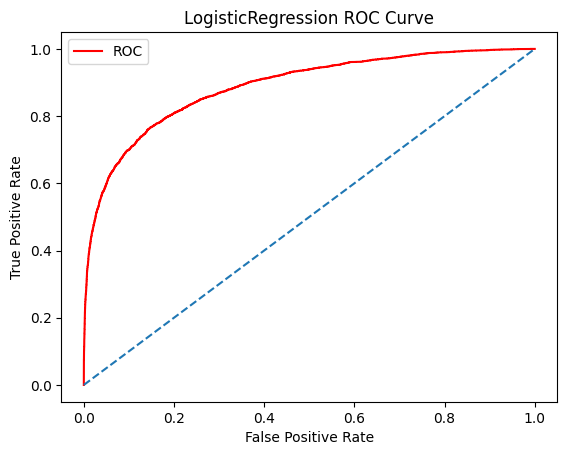

In [ ]:
log_f1 = evaluate_model(log_model, x_test, y_test)

##Classification Report for Gaussian NB Model with ROC Curve

Classification Report
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     14716
         1.0       0.91      0.52      0.66      4695

    accuracy                           0.87     19411
   macro avg       0.89      0.75      0.79     19411
weighted avg       0.87      0.87      0.86     19411

--
Confusion Matrix
 [[14462   254]
 [ 2262  2433]]
--
ROC Area under Curve = 0.7504753687929158


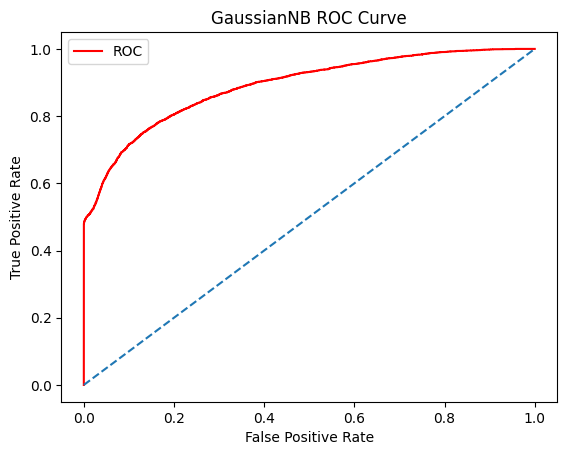

In [ ]:
gnb_f1 = evaluate_model(gnb_model, x_test, y_test)

# CONCLUSION

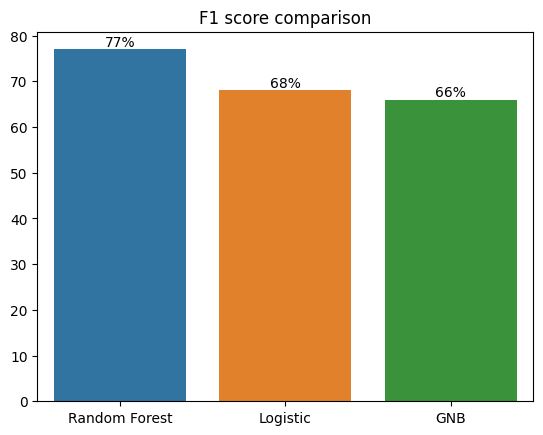

In [ ]:
x = ['Random Forest', 'Logistic', 'GNB']
y = [RF_f1*100, log_f1*100, gnb_f1*100]
#Membuat barplot menggunakan seaborn
ax = sns.barplot(x=x, y=y)

#Menambahkan teks pada setiap bar
for i, value in enumerate(y):
    ax.text(i, value, str(int(value)) + '%', ha='center', va='bottom')

#Menampilkan plot
plt.title("F1 score comparison")
plt.show()

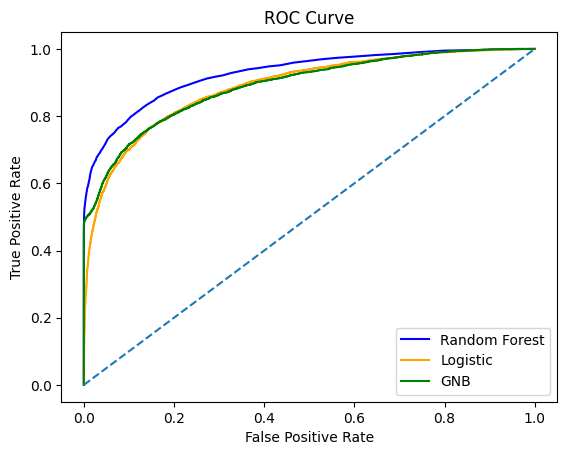

In [ ]:
probs1 = RF_model.predict_proba(x_test)
probs1 = probs1[:, 1]
fper1, tper1, thresholds1 = roc_curve(y_test, probs1)

probs2 = log_model.predict_proba(x_test)
probs2 = probs2[:, 1]
fper2, tper2, thresholds2 = roc_curve(y_test, probs2)

probs3 = gnb_model.predict_proba(x_test)
probs3 = probs3[:, 1]
fper3, tper3, thresholds3 = roc_curve(y_test, probs3)

plt.plot(fper1, tper1, color='blue', label='Random Forest')
plt.plot(fper2, tper2, color='orange', label='Logistic')
plt.plot(fper3, tper3, color='green', label='GNB')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##Combined plots

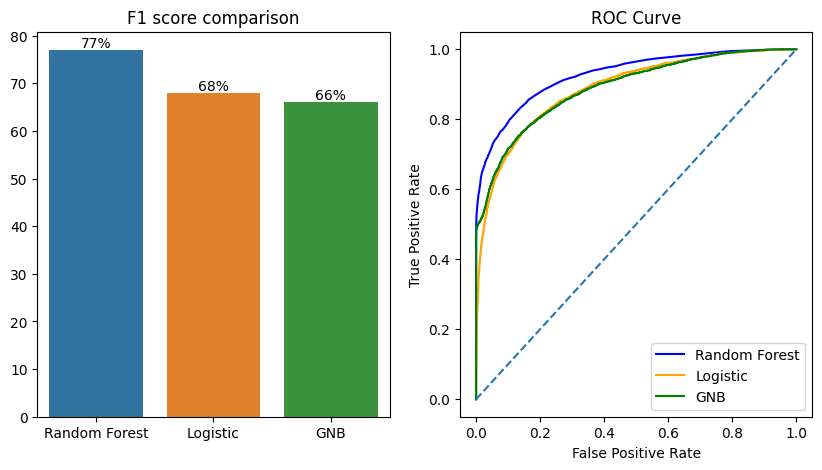

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

x = ['Random Forest', 'Logistic', 'GNB']
y = [RF_f1*100, log_f1*100, gnb_f1*100]

sns.barplot(ax=ax[0], x=x, y=y)
for i, value in enumerate(y):
    ax[0].text(i, value, str(int(value)) + '%', ha='center', va='bottom')
ax[0].set_title("F1 score comparison")

ax[1].plot(fper1, tper1, color='blue', label='Random Forest')
ax[1].plot(fper2, tper2, color='orange', label='Logistic')
ax[1].plot(fper3, tper3, color='green', label='GNB')
ax[1].plot([0, 1], [0, 1], linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve')
ax[1].legend()


jadi dapat dilihat bahwa Random Forest memiliki nilai f1 score dan AUC yang paling besar sehingga kita memilih model Random Forest untuk project ini